# 00 Post process using class

Based on tools and scripts provided by Michael Brazell and Lawrence Cheung

Utilize the abl_stats class to carry out post processing

See https://github.com/Exawind/amr-wind-frontend/blob/main/docs/casestudies/SWIFT/Postprocessing.ipynb

In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import netCDF4 as ncdf
import pandas as pd
import os

In [2]:
from moa_python.post_abl_stats import Post_abl_stats
from moa_python.post_plane import Post_plane

## Case 004

In [7]:
case_folder = ['/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_8ms/precursor']#,'/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_8ms/precursor','/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_9ms/precursor','/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_10ms/precursor','/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_12ms','/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_12ms']

abl_stats_file = 'post_processing/abl_statistics00000.nc'
hor_plane_file = 'post_processing/samplingPlane00000.nc'

if isinstance(case_folder,list):
    full_filename_abl_stats = []
    full_filename_hor_plane = []
    for n in range(len(case_folder)):
        full_filename_abl_stats = np.append(full_filename_abl_stats, os.path.join(case_folder[n],abl_stats_file ))
        full_filename_hor_plane = np.append(full_filename_hor_plane, os.path.join(case_folder[n],hor_plane_file ))
else:
    full_filename_abl_stats = [os.path.join(case_folder,abl_stats_file )]
    full_filename_hor_plane = [os.path.join(case_folder,hor_plane_file )]
    
abl = Post_abl_stats(full_filename_abl_stats)

Object is composed of 1 and time runs from 0.5 to 10800.0
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: e0ffbb62eb60-dirty
    created_on: Wed Jul 12 13:07:43 2023

    dimensions(sizes): num_time_steps(21600), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


In [8]:
settling_time = 7200
height = 150

In [ ]:
abl.plot_wind_measurements_at_height(height, settling_time=settling_time)

In [ ]:
abl.plot_vertical_temp_profile(t_min=settling_time)

In [ ]:
abl.plot_vertical_vel_profile(t_min=settling_time, height=height)

Nearest height to [5.] is [5.]
Nearest height to [5.] is [5.]
Nearest height to [15.] is [15.]
Nearest height to [15.] is [15.]
Nearest height to [25.] is [25.]
Nearest height to [25.] is [25.]
Nearest height to [35.] is [35.]
Nearest height to [35.] is [35.]
Nearest height to [45.] is [45.]
Nearest height to [45.] is [45.]
Nearest height to [55.] is [55.]
Nearest height to [55.] is [55.]
Nearest height to [65.] is [65.]
Nearest height to [65.] is [65.]
Nearest height to [75.] is [75.]
Nearest height to [75.] is [75.]
Nearest height to [85.] is [85.]
Nearest height to [85.] is [85.]
Nearest height to [95.] is [95.]
Nearest height to [95.] is [95.]
Nearest height to [105.] is [105.]
Nearest height to [105.] is [105.]
Nearest height to [115.] is [115.]
Nearest height to [115.] is [115.]
Nearest height to [125.] is [125.]
Nearest height to [125.] is [125.]
Nearest height to [135.] is [135.]
Nearest height to [135.] is [135.]
Nearest height to [145.] is [145.]
Nearest height to [145.] is [

Nearest height to [1175.] is [1175.]
Nearest height to [1175.] is [1175.]
Nearest height to [1185.] is [1185.]
Nearest height to [1185.] is [1185.]
Nearest height to [1195.] is [1195.]
Nearest height to [1195.] is [1195.]
Nearest height to [1205.] is [1205.]
Nearest height to [1205.] is [1205.]
Nearest height to [1215.] is [1215.]
Nearest height to [1215.] is [1215.]
Nearest height to [1225.] is [1225.]
Nearest height to [1225.] is [1225.]
Nearest height to [1235.] is [1235.]
Nearest height to [1235.] is [1235.]
Nearest height to [1245.] is [1245.]
Nearest height to [1245.] is [1245.]
Nearest height to [1255.] is [1255.]
Nearest height to [1255.] is [1255.]
Nearest height to [1265.] is [1265.]
Nearest height to [1265.] is [1265.]
Nearest height to [1275.] is [1275.]
Nearest height to [1275.] is [1275.]


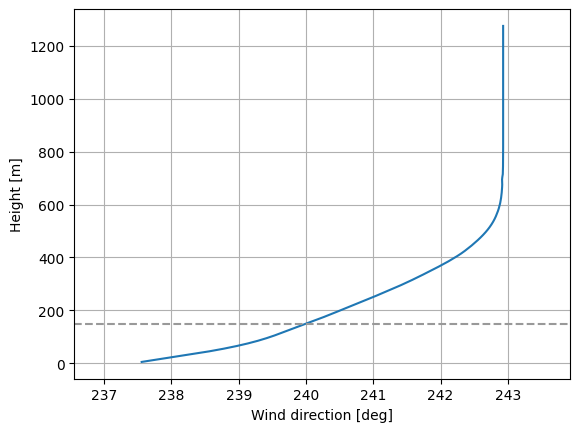

In [11]:
abl.plot_wind_direction_profile(t_min=settling_time, height=height)

In [10]:
veer = abl.get_wind_veer(height, 240, t_min=settling_time)
print(f'Veer is {veer} degrees')

Nearest height to [[35.]] is [35.]
Nearest height to [[35.]] is [35.]
Nearest height to [[45.]] is [45.]
Nearest height to [[45.]] is [45.]
Nearest height to [[55.]] is [55.]
Nearest height to [[55.]] is [55.]
Nearest height to [[65.]] is [65.]
Nearest height to [[65.]] is [65.]
Nearest height to [[75.]] is [75.]
Nearest height to [[75.]] is [75.]
Nearest height to [[85.]] is [85.]
Nearest height to [[85.]] is [85.]
Nearest height to [[95.]] is [95.]
Nearest height to [[95.]] is [95.]
Nearest height to [[105.]] is [105.]
Nearest height to [[105.]] is [105.]
Nearest height to [[115.]] is [115.]
Nearest height to [[115.]] is [115.]
Nearest height to [[125.]] is [125.]
Nearest height to [[125.]] is [125.]
Nearest height to [[135.]] is [135.]
Nearest height to [[135.]] is [135.]
Nearest height to [[145.]] is [145.]
Nearest height to [[145.]] is [145.]
Nearest height to [[155.]] is [155.]
Nearest height to [[155.]] is [155.]
Nearest height to [[165.]] is [165.]
Nearest height to [[165.]] is

In [12]:
TI = abl.get_turbulence_intensity_at_height(height, t_min=settling_time)

print('Turbulence Intensity [%]: ', TI)

Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Turbulence Intensity [%]:  3.438304109229361


Nearest height to [5.] is [5.]
Nearest height to [5.] is [5.]
Nearest height to [5.] is [5.]
Nearest height to [5.] is [5.]
Nearest height to [5.] is [5.]
Nearest height to [5.] is [5.]
Nearest height to [15.] is [15.]
Nearest height to [15.] is [15.]
Nearest height to [15.] is [15.]
Nearest height to [15.] is [15.]
Nearest height to [15.] is [15.]
Nearest height to [15.] is [15.]
Nearest height to [25.] is [25.]
Nearest height to [25.] is [25.]
Nearest height to [25.] is [25.]
Nearest height to [25.] is [25.]
Nearest height to [25.] is [25.]
Nearest height to [25.] is [25.]
Nearest height to [35.] is [35.]
Nearest height to [35.] is [35.]
Nearest height to [35.] is [35.]
Nearest height to [35.] is [35.]
Nearest height to [35.] is [35.]
Nearest height to [35.] is [35.]
Nearest height to [45.] is [45.]
Nearest height to [45.] is [45.]
Nearest height to [45.] is [45.]
Nearest height to [45.] is [45.]
Nearest height to [45.] is [45.]
Nearest height to [45.] is [45.]
Nearest height to [55.

Nearest height to [395.] is [395.]
Nearest height to [395.] is [395.]
Nearest height to [405.] is [405.]
Nearest height to [405.] is [405.]
Nearest height to [405.] is [405.]
Nearest height to [405.] is [405.]
Nearest height to [405.] is [405.]
Nearest height to [405.] is [405.]
Nearest height to [415.] is [415.]
Nearest height to [415.] is [415.]
Nearest height to [415.] is [415.]
Nearest height to [415.] is [415.]
Nearest height to [415.] is [415.]
Nearest height to [415.] is [415.]
Nearest height to [425.] is [425.]
Nearest height to [425.] is [425.]
Nearest height to [425.] is [425.]
Nearest height to [425.] is [425.]
Nearest height to [425.] is [425.]
Nearest height to [425.] is [425.]
Nearest height to [435.] is [435.]
Nearest height to [435.] is [435.]
Nearest height to [435.] is [435.]
Nearest height to [435.] is [435.]
Nearest height to [435.] is [435.]
Nearest height to [435.] is [435.]
Nearest height to [445.] is [445.]
Nearest height to [445.] is [445.]
Nearest height to [4

Nearest height to [785.] is [785.]
Nearest height to [795.] is [795.]
Nearest height to [795.] is [795.]
Nearest height to [795.] is [795.]
Nearest height to [795.] is [795.]
Nearest height to [795.] is [795.]
Nearest height to [795.] is [795.]
Nearest height to [805.] is [805.]
Nearest height to [805.] is [805.]
Nearest height to [805.] is [805.]
Nearest height to [805.] is [805.]
Nearest height to [805.] is [805.]
Nearest height to [805.] is [805.]
Nearest height to [815.] is [815.]
Nearest height to [815.] is [815.]
Nearest height to [815.] is [815.]
Nearest height to [815.] is [815.]
Nearest height to [815.] is [815.]
Nearest height to [815.] is [815.]
Nearest height to [825.] is [825.]
Nearest height to [825.] is [825.]
Nearest height to [825.] is [825.]
Nearest height to [825.] is [825.]
Nearest height to [825.] is [825.]
Nearest height to [825.] is [825.]
Nearest height to [835.] is [835.]
Nearest height to [835.] is [835.]
Nearest height to [835.] is [835.]
Nearest height to [8

Nearest height to [1175.] is [1175.]
Nearest height to [1175.] is [1175.]
Nearest height to [1175.] is [1175.]
Nearest height to [1175.] is [1175.]
Nearest height to [1175.] is [1175.]
Nearest height to [1175.] is [1175.]
Nearest height to [1185.] is [1185.]
Nearest height to [1185.] is [1185.]
Nearest height to [1185.] is [1185.]
Nearest height to [1185.] is [1185.]
Nearest height to [1185.] is [1185.]
Nearest height to [1185.] is [1185.]
Nearest height to [1195.] is [1195.]
Nearest height to [1195.] is [1195.]
Nearest height to [1195.] is [1195.]
Nearest height to [1195.] is [1195.]
Nearest height to [1195.] is [1195.]
Nearest height to [1195.] is [1195.]
Nearest height to [1205.] is [1205.]
Nearest height to [1205.] is [1205.]
Nearest height to [1205.] is [1205.]
Nearest height to [1205.] is [1205.]
Nearest height to [1205.] is [1205.]
Nearest height to [1205.] is [1205.]
Nearest height to [1215.] is [1215.]
Nearest height to [1215.] is [1215.]
Nearest height to [1215.] is [1215.]
N

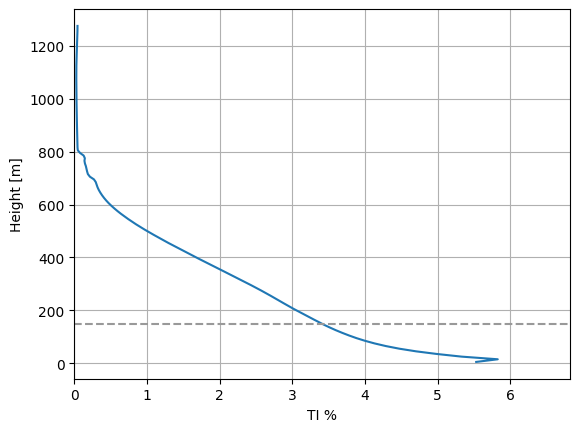

In [13]:
abl.plot_turbulence_intensity_profile(t_min=settling_time, height=height)

In [14]:
hor_plane = []
Nfiles = len(full_filename_hor_plane)
for n in range(Nfiles):
    hor_plane.append(Post_plane(full_filename_hor_plane[n],100))

Plane has 4 plane(s) in 22 time steps from 0.0 to 10500.0
Plane offsets: [  5.  90. 150. 255.]


Plotting u velocity for plane at location 150 at time 7200
Nearest point to 150 is 150.0
Nearest time to 7200 is 7000.0
Returning u velocity plane for slice at 150.0 at time 7000.0


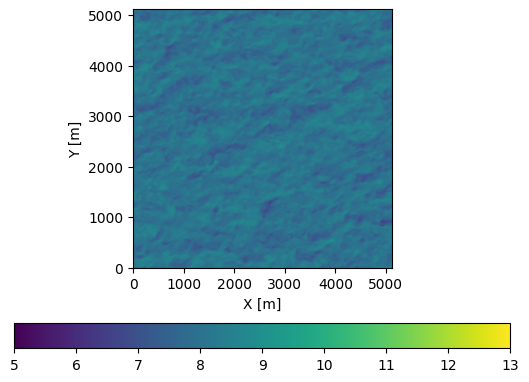

In [15]:
for n in range(Nfiles):
    hor_plane[n].plot_plane(height,settling_time, vmin=5., vmax=13.)

Plotting u mean velocity for plane at location 150
Nearest point to 150 is 150.0
Returning u mean velocity plane for slice at 150.0
Nearest time to 0.0 is 0.0
Nearest time to 10500.0 is 10500.0


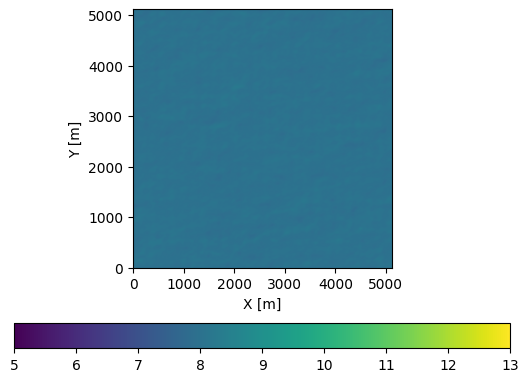

In [16]:
for n in range(Nfiles):
    hor_plane[n].plot_mean_plane(height, vmin=5., vmax=13.)

## Case 004 Restart

In [17]:
case_folder = '/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_8ms/restarts/baseline'
settling_time = settling_time + 0.5

In [18]:
abl_stats_file = 'post_processing/abl_statistics14400.nc'
hor_plane_file = 'post_processing/samplingPlane14400.nc'

full_filename_abl_stats = os.path.join(case_folder,abl_stats_file )
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file )
abl_restart = Post_abl_stats([full_filename_abl_stats])

Object is composed of 1 and time runs from 7205.000000000018 to 10799.999999965657
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: e0ffbb62eb60-dirty
    created_on: Wed Jul 19 15:22:54 2023

    dimensions(sizes): num_time_steps(720), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]


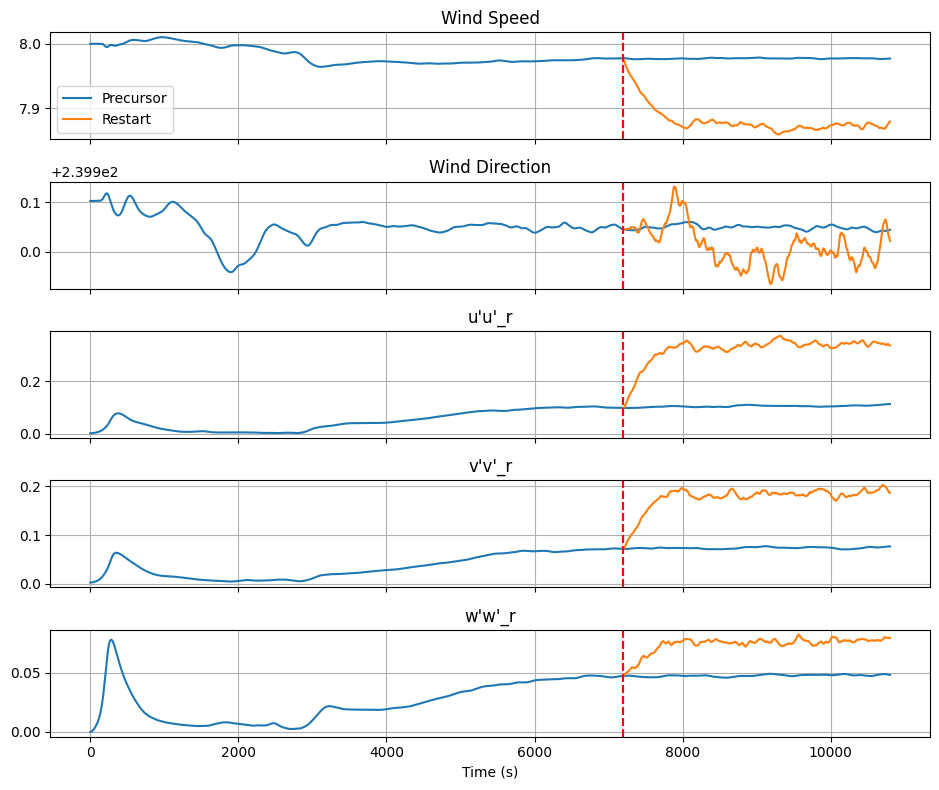

In [19]:
fig, axarr = plt.subplots(5,1,figsize=(9.5,8), sharex=True, tight_layout=True)
abl.plot_wind_measurements_at_height(height, settling_time=settling_time, axarr=axarr, label='Precursor')
abl_restart.plot_wind_measurements_at_height(height, settling_time=settling_time, axarr=axarr, label='Restart')
fig = plt.gcf


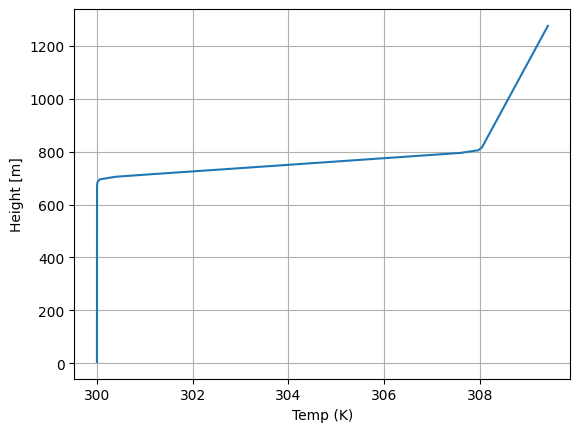

In [20]:
abl.plot_vertical_temp_profile(t_min=settling_time)

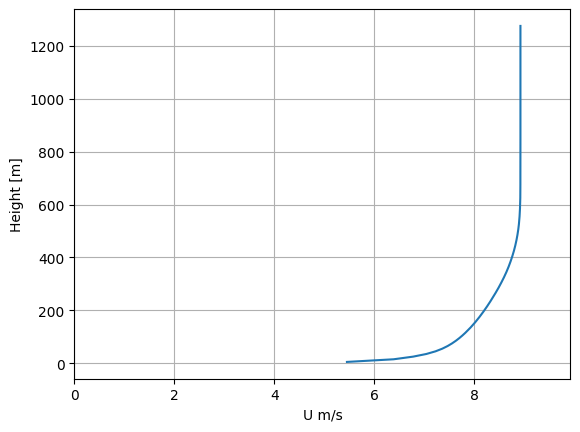

In [21]:
abl.plot_vertical_vel_profile(t_min=settling_time)

In [22]:
hor_plane = Post_plane(full_filename_hor_plane)

Plane has 1 plane(s) in 361 time steps from 7200.0 to 10799.999999965657
Plane offsets: [0.]


Plotting u velocity for plane at location 150 at time 9000
Nearest point to 150 is 0.0
Nearest time to 9000 is 8999.999999991851
Returning u velocity plane for slice at 0.0 at time 8999.999999991851


<Axes: xlabel='X [m]', ylabel='Y [m]'>

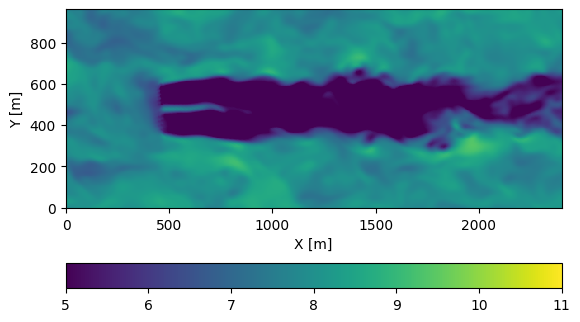

In [23]:
hor_plane.plot_plane(height,9000, vmin=5., vmax=11.)

Plotting u mean velocity for plane at location 150
Nearest point to 150 is 0.0
Returning u mean velocity plane for slice at 0.0
Nearest time to 7200.0 is 7200.0
Nearest time to 10799.999999965657 is 10799.999999965657


<Axes: xlabel='X [m]', ylabel='Y [m]'>

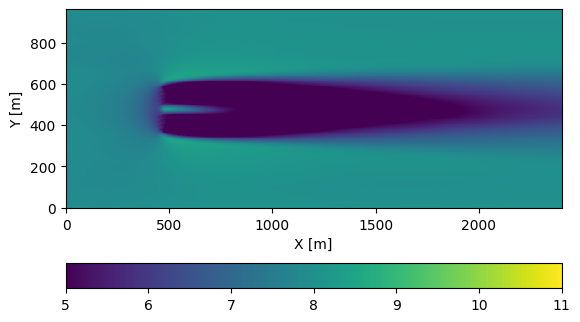

In [24]:
hor_plane.plot_mean_plane(height, vmin=5., vmax=11.)